### IMPORT THE LIBRARIES 

In [2]:
from PIL import Image, ImageFilter
from skimage.feature import greycomatrix
import numpy as np
from matplotlib import pyplot as plt
import cv2 as c
import math


### For low intensity image

### OPEN THE IMAGE 

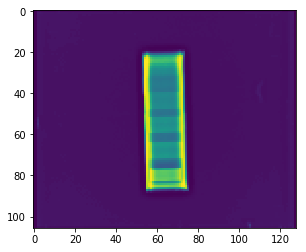

In [3]:
low_image = Image.open("X-Rays/70_40.bmp")
plt.imshow(low_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [5]:
width, height = low_image.size
print(width,height)

128 106


### CROP THE REGION OF INTEREST FROM THE IMAGE

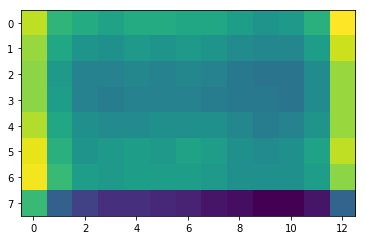

In [6]:
# left = 47
# top = 88.8
# right = 58
# bottom = 94
# low_cropped_img = low_image.crop((left,top,right,bottom))
# low_cropped_img.show()
# plt.imshow(low_cropped_img)

left = 58
top = 65
right = 71
bottom = 73
low_cropped_img = low_image.crop((left,top,right,bottom))
low_cropped_img.show()
plt.imshow(low_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [7]:
np.unique(low_cropped_img)

array([ 89,  91,  92,  94,  95,  96,  99, 105, 106, 109, 110, 111, 112,
       113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 132,
       133, 135, 136, 137, 139, 140, 141], dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [8]:
low_avg_pixel_intensity = np.mean(low_cropped_img)
print(low_avg_pixel_intensity)

115.96153846153847


### For High intensity image

### OPEN THE IMAGE 

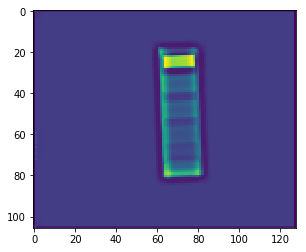

In [9]:
high_image = Image.open("X-Rays/111_120.bmp")
plt.imshow(high_image)

### FIND THE WIDTH AND HEIGHT OF THE IMAGE

In [10]:
width, height = high_image.size
print(width,height)

128 106


### CROP THE REGION OF INTEREST FROM THE IMAGE

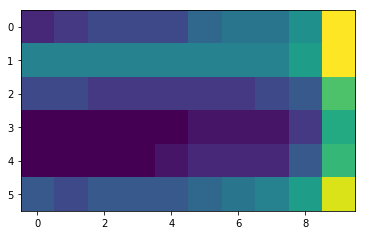

In [11]:
# left = 65
# top = 23
# right = 75
# bottom = 27
# high_cropped_img = high_image.crop((left,top,right,bottom))
# high_cropped_img.show()
# plt.imshow(high_cropped_img)

left = 67
top = 32
right = 77
bottom = 38
high_cropped_img = high_image.crop((left,top,right,bottom))
high_cropped_img.show()
plt.imshow(high_cropped_img)

### UNIQUE VALUES FROM AN ARRAY

In [13]:
np.unique(high_cropped_img)

array([68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 85, 86],
      dtype=uint8)

### AVERAGE PIXEL INTENSITY

In [14]:
high_avg_pixel_intensity = np.mean(high_cropped_img)
print(high_avg_pixel_intensity)

73.23333333333333


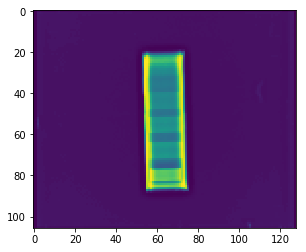

In [52]:
low_image = Image.open("X-Rays/70_40.bmp")
plt.imshow(low_image)

### Find K Value for Low Intensity

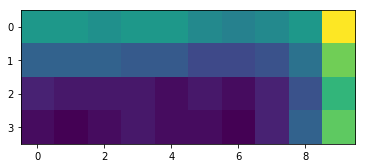

In [512]:
left = 61
top = 73
right = 71
bottom = 77
low_cropped_img = low_image.crop((left,top,right,bottom))
# low_cropped_img.show()
plt.imshow(low_cropped_img)

In [513]:
k_low_avg_pixel_intensity = np.mean(low_cropped_img)
print(k_low_avg_pixel_intensity)

75.3


### Find K Value for High Intensity

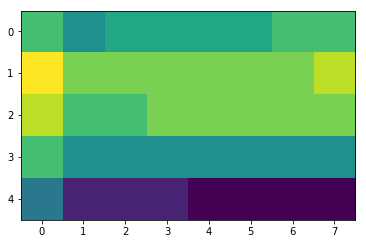

In [514]:
left = 67
top = 67
right = 75
bottom = 72
high_cropped_img = high_image.crop((left,top,right,bottom))
# high_cropped_img.show()
plt.imshow(high_cropped_img)

In [515]:
k_high_avg_pixel_intensity = np.mean(high_cropped_img)
print(k_high_avg_pixel_intensity)

52.725


In [516]:
K = math.log(k_low_avg_pixel_intensity)/math.log(k_high_avg_pixel_intensity)
# K = 1.089
K

1.0898820538842497

In [517]:
mu_b_low = 0.2689

In [518]:
mu_b_high = 0.1761

In [519]:
low_avg_pixel_intensity

115.96153846153847

In [520]:
high_avg_pixel_intensity

73.23333333333333

In [521]:
math.log(low_avg_pixel_intensity)

4.753258571139804

In [522]:
(K * math.log(high_avg_pixel_intensity))

4.679572833466117

In [523]:
math.log(high_avg_pixel_intensity)

4.293650690722455

In [524]:
print(math.log(low_avg_pixel_intensity))
print(K * math.log(high_avg_pixel_intensity))
Numerator = (math.log(low_avg_pixel_intensity)) - (K * math.log(high_avg_pixel_intensity)) 
print(Numerator)

4.753258571139804
4.679572833466117
0.0736857376736868


In [525]:
Denominator = mu_b_low - (K * mu_b_high)
print(Denominator)
K

0.0769717703109836


1.0898820538842497

In [526]:
M_b = Numerator/Denominator

In [527]:
print(M_b)

0.9573085999708664


In [219]:
k_some = 0.1749/0.165

k_some = 0.1823/0.165

In [689]:
k_some

1.06

In [690]:
Numerator = (math.log(low_avg_pixel_intensity)) - (k_some * math.log(high_avg_pixel_intensity))
print(Numerator)

0.20198883897400144


In [691]:
Denominator = mu_b_low - (k_some * mu_b_high)
print(Denominator)

0.08223399999999995


In [692]:
M_b = Numerator/Denominator

In [693]:
M_b

2.4562691705863946

In [694]:
0.02568454545454546 * 1.003

0.025761599090909092

array([ 89,  90,  91,  92,  93,  94,  95,  96, 103, 104, 106, 108, 109,
       110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122,
       124, 126, 127, 129, 131, 132, 139, 142, 143, 144, 146, 153, 155,
       158, 163, 167, 170, 175, 180, 184, 185, 187, 189, 190, 201, 203,
       204, 205, 206], dtype=uint8)

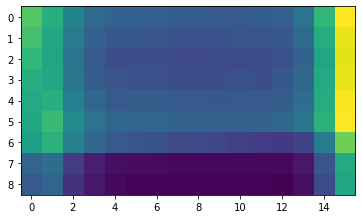

In [144]:
imageref = Image.open("X-Rays/111_120.bmp").convert('L')
imageref = imageref.rotate(180)
left = 48
top = 55
right = 64
bottom = 64
imga = np.array(imageref.crop((left,top,right,bottom)))
plt.imshow(imga)
# Image.fromarray(imga).show()
np.mean(imga)
np.unique(imgb)

array([ 43,  44,  45,  46,  47,  49,  51,  57,  59,  60,  61,  62,  63,
        64,  65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,
        77,  79,  80,  81,  82,  83,  84,  85,  86,  88,  96,  99, 100,
       101, 102, 103, 104, 106, 107, 110, 113, 117, 134, 135, 137, 138],
      dtype=uint8)

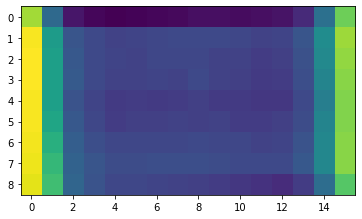

In [143]:
imageref1 = Image.open("X-Rays/70_40.bmp").convert('L')
left = 56
top = 51
right = 72
bottom = 60
imgb = np.array(imageref1.crop((left,top,right,bottom)))
plt.imshow(imgb)
# Image.fromarray(imgb).show()
np.mean(imgb)
np.unique(imga)

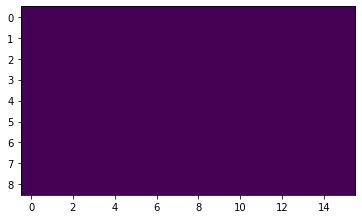

In [136]:
Z = plantcv.image_subtract(imga,imgb)
# Z = c.subtract(imga,imgb)
# Z = c.absdiff(imga,imgb)
# image1= np.int32(imga)
# image2= np.int32(imgb)
# Z = image1 - image2
plt.imshow(Z)
i = Image.fromarray(Z)
i.show()


In [142]:
np.unique(i)

array([0], dtype=uint8)